In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## 参考资料

- 文字资料: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
- 代码资料: https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Data_Visualization_Iris_Dataset_Blog.ipynb
- sklearn PCA使用指南: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

## 读取数据

In [2]:
df = pd.read_csv('./iris.csv', names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [52]:
df.shape

(150, 5)

## 数据标准化

- PCA is effected by scale so you need to scale the features in your data before applying PCA.(PCA会被数据的大小所影响, 所以在做之前, 我们需要先对数据进行标准化)
- 我们使用StandardScaler进行标准化, 标准化之后变为均值为0, 方差为1的数据

In [3]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [4]:
# 查看标准化之后的数据
pd.DataFrame(data = x, columns = features).head()

sepal length  sepal width  petal length  petal width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977

## 查看降维后的维数

- 选择降到多少维度比较合适

In [41]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)

In [42]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

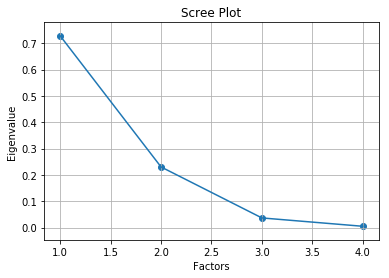

In [43]:
# 进行可视化
importance = pca.explained_variance_ratio_
plt.scatter(range(1,5),importance)
plt.plot(range(1,5),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## 使用PCA降维(降维到2维)

- 降维到2维可以方便进行可视化

In [44]:
pca = PCA(n_components=2)

In [45]:
principalComponents = pca.fit_transform(x)

In [46]:
# 降维后的新数据
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

principal component 1  principal component 2       target
0              -2.264542               0.505704  Iris-setosa
1              -2.086426              -0.655405  Iris-setosa
2              -2.367950              -0.318477  Iris-setosa
3              -2.304197              -0.575368  Iris-setosa
4              -2.388777               0.674767  Iris-setosa

In [47]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [48]:
pca.explained_variance_ 

array([2.93035378, 0.92740362])

## 得到转换的关系(系数)

In [49]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])

$PCA_1 = 0.52237162*x_1 + -0.26335492*x_2 + 0.58125401*x_3 + 0.56561105*x_4$

In [50]:
# 这个计算的值就是上面生成的值, 这个相当于是系数
(np.dot(x[0],pca.components_[0]), np.dot(x[0],pca.components_[1]))

(-2.2645417283949003, 0.5057039027737843)

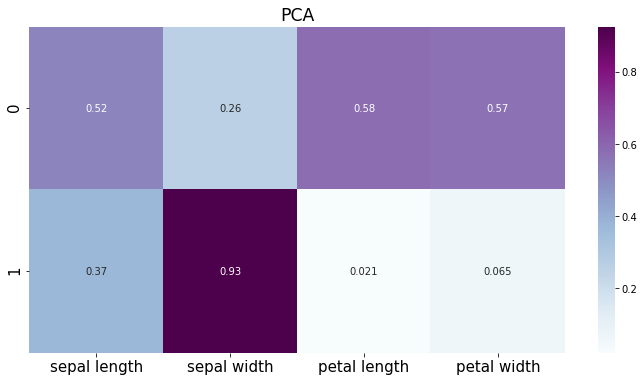

In [51]:
# 对系数进行可视化
import seaborn as sns

df_cm = pd.DataFrame(np.abs(pca.components_), columns=df.columns[:-1])
plt.figure(figsize = (12,6))
ax = sns.heatmap(df_cm, annot=True, cmap="BuPu")
# 设置y轴的字体的大小
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
plt.title('PCA', fontsize='xx-large')
# Set y-axis label
plt.savefig('factorAnalysis.png', dpi=200)

## 进行可视化

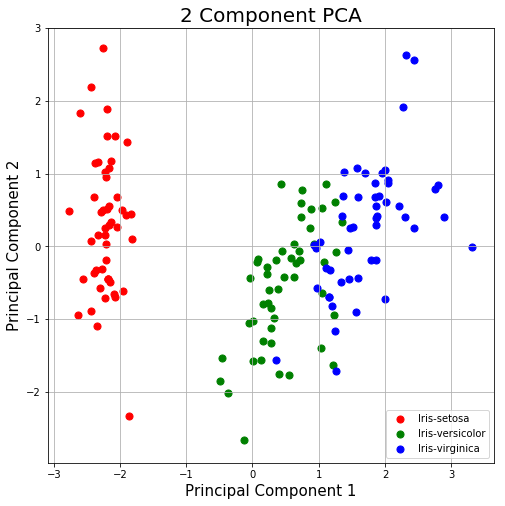

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    # 选择某个label下的数据进行绘制
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## 做一下FA的实验

In [53]:
from factor_analyzer import FactorAnalyzer

In [56]:
# 查看是否适合做因子分析
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(x)
chi_square_value, p_value

(706.3613782659306, 1.2867954087793657e-149)

In [58]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(4, rotation=None)
fa.fit(x)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()

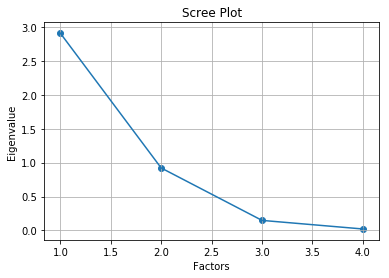

In [60]:
# Create scree plot using matplotlib
plt.scatter(range(1,4+1),ev)
plt.plot(range(1,4+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [61]:
# 降到2维
fa = FactorAnalyzer(2, rotation="varimax")
fa.fit(x)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=2, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

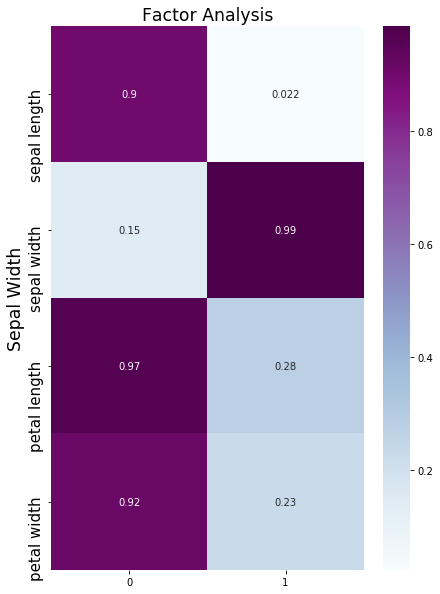

In [68]:
# 对系数矩阵进行可视化
df_cm = pd.DataFrame(np.abs(fa.loadings_), index=df.columns[:-1])
plt.figure(figsize = (7,10))
ax = sns.heatmap(df_cm, annot=True, cmap="BuPu")
# 设置y轴的字体的大小
ax.yaxis.set_tick_params(labelsize=15)
plt.title('Factor Analysis', fontsize='xx-large')
# Set y-axis label
plt.ylabel('Sepal Width', fontsize='xx-large')
plt.savefig('factorAnalysis.png', dpi=200)

In [69]:
# 画出降维后的图像
x_2 = fa.transform(x)

In [71]:
# 降维后的新数据
principalDf = pd.DataFrame(data=x_2, columns=['FA 1', 'FA 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

FA 1      FA 2       target
0 -1.154808  0.869414  Iris-setosa
1 -1.577805 -0.370153  Iris-setosa
2 -1.428828  0.126299  Iris-setosa
3 -1.295267 -0.073661  Iris-setosa
4 -1.030080  1.128438  Iris-setosa

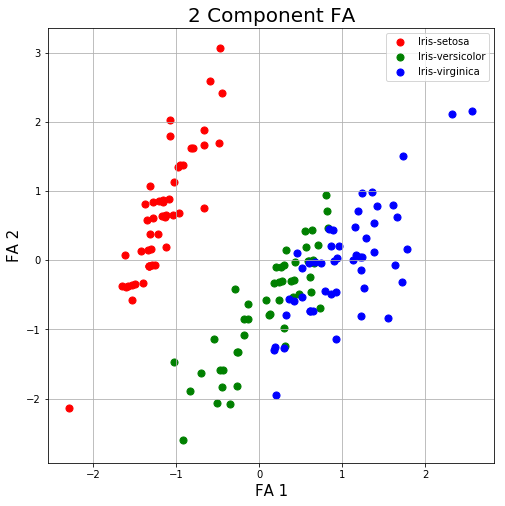

In [74]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('FA 1', fontsize = 15)
ax.set_ylabel('FA 2', fontsize = 15)
ax.set_title('2 Component FA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    # 选择某个label下的数据进行绘制
    ax.scatter(finalDf.loc[indicesToKeep, 'FA 1']
               , finalDf.loc[indicesToKeep, 'FA 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()